In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import numpy.random as r
from env import get_db_url
import matplotlib.pyplot as plt

1)A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 

- Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<BarContainer object of 9 artists>

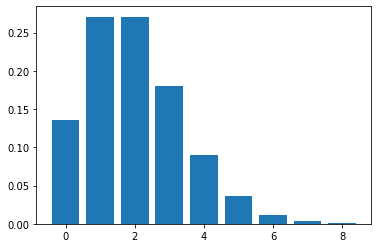

In [107]:
dist = stats.poisson(2)

x = [0,1,2,3,4,5,6,7,8]
y = dist.pmf(x)

plt.bar(x,y)

- What is the probability that no cars drive up in the noon hour?



In [82]:
#theoretical
#p(n == 0)
stats.poisson(2).pmf(0)

0.1353352832366127

In [90]:
#experiemntal
trials = r.poisson(2, 10_000)
(trials == 0).mean()

0.1345

- What is the probability that 3 or more cars come through the drive through?


In [54]:
#theoretical
#p(n > 2)
stats.poisson(2).sf(2)

0.32332358381693654

In [9]:
#experimental
(trials > 2).mean()

0.3273

- How likely is it that the drive through gets at least 1 car?


In [55]:
#theoretical
#p(n > 0)
stats.poisson(2).sf(0)

0.8646647167633873

In [11]:
#experimental
(trials > 0).mean()

0.8583

2)Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?

In [21]:
#theoretical
µ = 3.0
σ = .3
stats.norm(μ, σ).isf(.05)

3.4934560880854417

In [25]:
#experiemntal
trials = r.normal(μ, σ, 10_000)
np.quantile(trials, .95)

3.4947977741773526

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [7]:
#theoretical
upper_bound = stats.norm(μ, σ).ppf(.3)
lower_bound = stats.norm(μ, σ).ppf(.2)
print(f'''The third to last decile is between 
{lower_bound} and {upper_bound}''')

The third to last decile is between 
2.7475136299281258 and 2.842679846187588


In [29]:
#experimental
upper_bound = np.quantile(trials, .3)
lower_bound = np.quantile(trials, .2)
print(f'''The third to last decile is between 
{lower_bound} and {upper_bound}''')

The third to last decile is between 
2.74915486490902 and 2.8462588696891693


3)A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?



In [48]:
#theoretical
observations = 4326
p_click = .02
observed = 97
stats.binom(observations, p_click).sf(observed - 1)

0.1397582363130086

In [47]:
#experiemntal
trials = r.binomial(observations, p_click, 10_000)
(trials >= 97).mean()

0.1342

4)You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.



- What is the probability that at least one of your first 60 answers is correct?


In [49]:
#binomial distribution with a 1% chance of success, p(n >= 1)
#theoretical
observations = 60
p_correct = .01
stats.binom(observations, p_correct).sf(0)  

0.4528433576092388

In [51]:
#experimental
trials = r.binomial(observations, p_correct, 10_000)
(trials > 0).mean()

0.454

5)The codeup staff tends to get upset when the student break area is not cleaned up. 
Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

- How likely is it that the break area gets cleaned up each day? 





In [54]:
#number of visits each day:
classes = 3
class_size = 22
p_visit = .9
visits = round(classes * class_size * p_visit, 0)
visits

59.0

In [56]:
#probability that at least one person cleaned, p(n > 0)
#theoretical
p_clean = .03
stats.binom(visits, p_clean).sf(0)

0.8342199288437355

In [57]:
#experimental
trials = r.binomial(visits, p_clean, 10_000)
(trials > 0).mean()

0.8331

- How likely is it that it goes two days without getting cleaned up? 

In [59]:
#probability no one cleaned on either day p(n <= 0)
#theoretical
p_cleaned = stats.binom(visits, p_clean).sf(0)
stats.binom(2,p_cleaned).cdf(0)

0.027483031992576113

In [63]:
#experimental
trials = r.binomial(2, p_cleaned, 1_000_000)
(trials == 0).mean()

0.02761

- All week?

In [65]:
#p(n == 0)
#theoretical
stats.binom(7,p_cleaned).cdf(0)

3.441329456987961e-06

In [73]:
#experimental
trials = r.binomial(7, p_cleaned, 1_000_000)
(trials == 0).mean()

3.394e-06

6)You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 



In [89]:
#expected(μ) and standard dev(σ) of number of people in line
μ = 15
σ = 3

- If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [83]:
#find out target wait_time
lunch_time = 60
eating_time = 15
prep_time = 10
my_order_time = 2
wait_time = lunch_time -prep_time - eating_time - my_order_time
wait_time


33

In [88]:
#find expected and std of wait_time from number of people in line
μ_time = μ * 2
σ_time = σ * 2
f"mu = {μ_time}, sigma = {σ_time}"

'mu = 30, sigma = 6'

In [85]:
#probability time is within target p(n <= wait_time)
#theoretical
stats.norm(μ_time, σ_time).cdf(wait_time)

0.6914624612740131

In [86]:
#experimental
trials = r.normal(μ_time, σ_time, 10_000)
(trials <= wait_time).mean()

0.6943

7)Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

In [7]:
url = get_db_url('employees')
salaries = pd.read_sql('''SELECT salary FROM salaries WHERE to_date > now()''', url)
salaries.head(5)

,salary
0,88958
1,72527
2,43311
3,74057
4,94692


In [13]:
μ = salaries.mean()
σ = salaries.std()
print(f'mu: {μ[0]}\nsigma: {σ[0]}')

mu: 72012.23585730705
sigma: 17309.995380251985


In [14]:
dist_model = stats.norm(μ, σ)

- What percent of employees earn less than 60,000?

In [15]:
dist_model.cdf(60_000)

array([0.24385742])